In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

data

array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

In [8]:
# Initialize and fit the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination parameter as needed
clf.fit(data)

# Predict whether each data point is an anomaly (1 for inliers, -1 for outliers)
predictions = clf.predict(data)

predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

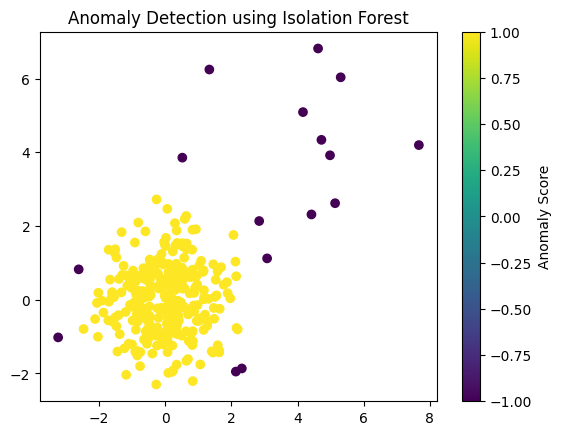

Detected anomalies: [ 37 104 110 131 142 239 300 301 302 303 304 305 306 307 308 309]


In [9]:
# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == -1)[0]
print("Detected anomalies:", anomalies_indices)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])
data


array([[ 4.96714153e-01, -1.38264301e-01],
       [ 6.47688538e-01,  1.52302986e+00],
       [-2.34153375e-01, -2.34136957e-01],
       [ 1.57921282e+00,  7.67434729e-01],
       [-4.69474386e-01,  5.42560044e-01],
       [-4.63417693e-01, -4.65729754e-01],
       [ 2.41962272e-01, -1.91328024e+00],
       [-1.72491783e+00, -5.62287529e-01],
       [-1.01283112e+00,  3.14247333e-01],
       [-9.08024076e-01, -1.41230370e+00],
       [ 1.46564877e+00, -2.25776300e-01],
       [ 6.75282047e-02, -1.42474819e+00],
       [-5.44382725e-01,  1.10922590e-01],
       [-1.15099358e+00,  3.75698018e-01],
       [-6.00638690e-01, -2.91693750e-01],
       [-6.01706612e-01,  1.85227818e+00],
       [-1.34972247e-02, -1.05771093e+00],
       [ 8.22544912e-01, -1.22084365e+00],
       [ 2.08863595e-01, -1.95967012e+00],
       [-1.32818605e+00,  1.96861236e-01],
       [ 7.38466580e-01,  1.71368281e-01],
       [-1.15648282e-01, -3.01103696e-01],
       [-1.47852199e+00, -7.19844208e-01],
       [-4.

In [11]:
# Label the data (1 for normal data, 0 for anomalies)
labels = np.concatenate([np.ones(len(normal_data)), np.zeros(len(anomalies))])
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

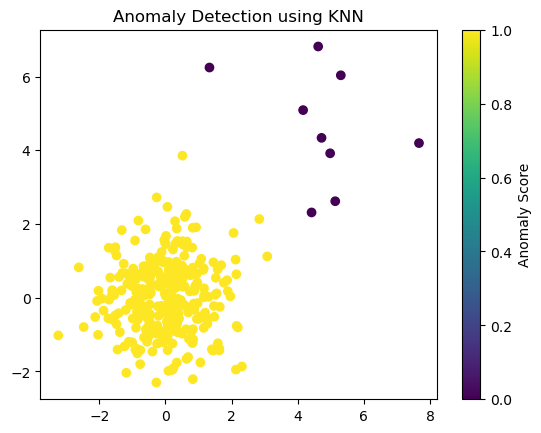

Detected anomalies: [300 301 302 304 305 306 307 308 309]


In [11]:

# Initialize and fit the KNN model
k = 3  # Adjust the number of neighbors as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data, labels)

# Predict whether each data point is an anomaly (0 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using KNN")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == 0)[0]
print("Detected anomalies:", anomalies_indices)

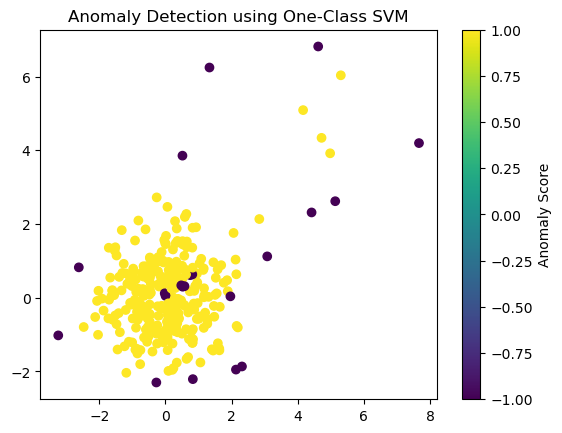

Detected anomalies: [ 37  74 104 110 131 142 149 151 152 201 230 235 238 239 287 296 300 302
 304 306 307]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Initialize and fit the One-Class SVM model
clf = OneClassSVM(nu=0.05, kernel="rbf")  # Adjust the nu parameter as needed
clf.fit(data)

# Predict whether each data point is an anomaly (-1 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using One-Class SVM")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == -1)[0]
print("Detected anomalies:", anomalies_indices)

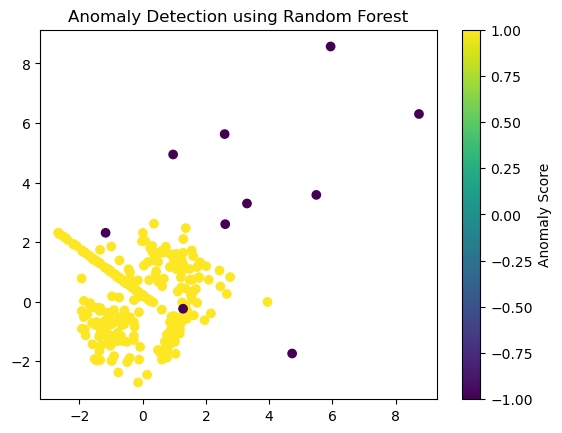

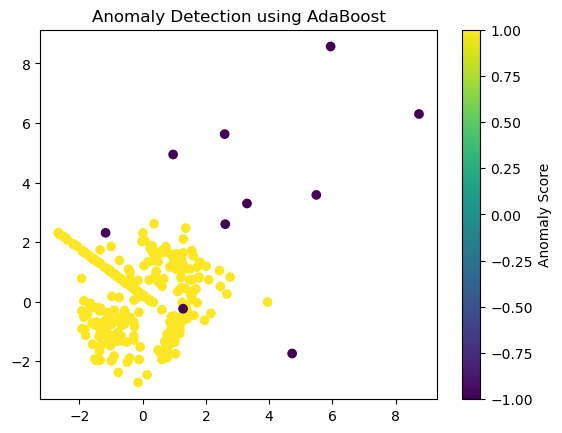

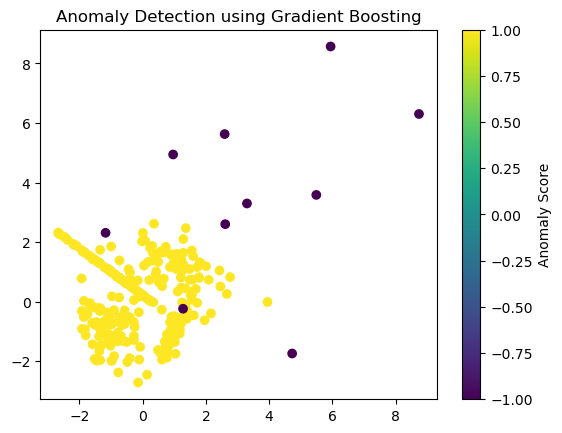

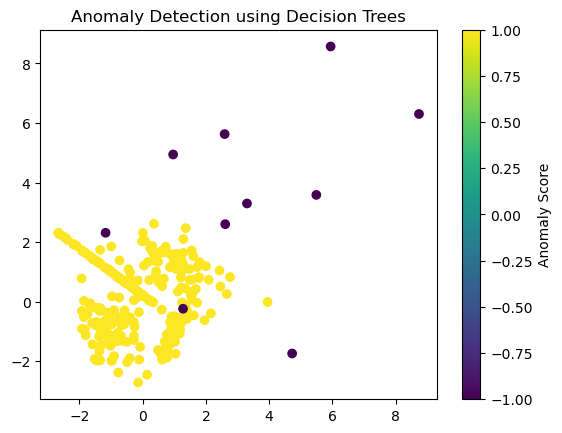

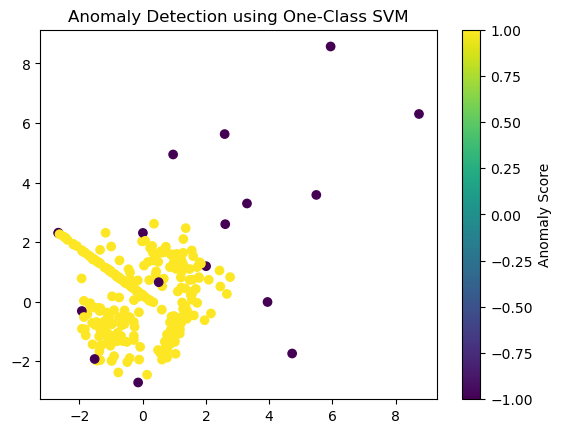

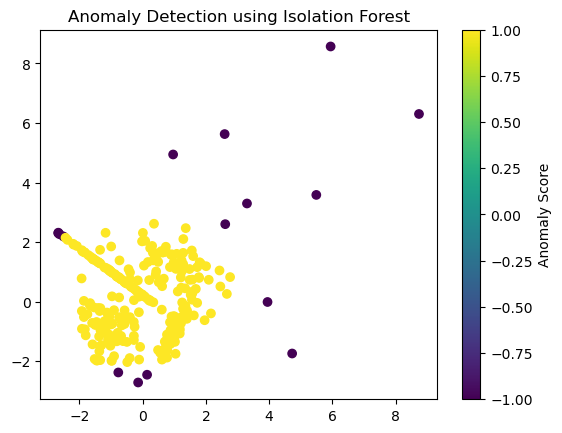

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
from scipy.stats import norm

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data, _ = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
anomalies = np.random.randn(10, 2) * 3 + np.array([4, 4])  # Generating anomalies far from normal data
data = np.vstack([normal_data, anomalies])

# Labels (1 for normal data, -1 for anomalies)
labels = np.array([1] * len(normal_data) + [-1] * len(anomalies))

# Initialize and fit Random Forest classifier for anomaly detection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data, labels)
rf_predictions = rf.predict(data)

# Initialize and fit AdaBoost classifier for anomaly detection
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(data, labels)
ada_predictions = ada.predict(data)

# Initialize and fit Gradient Boosting classifier for anomaly detection
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(data, labels)
gb_predictions = gb.predict(data)

# Initialize and fit Decision Tree classifier for anomaly detection
dt = DecisionTreeClassifier(random_state=42)
dt.fit(data, labels)
dt_predictions = dt.predict(data)

# Initialize and fit One-Class SVM for anomaly detection
svm = OneClassSVM(kernel='rbf', nu=0.05)
svm.fit(data)
svm_predictions = svm.predict(data)

# Initialize and fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(data)
iso_forest_predictions = iso_forest.predict(data)

# Initialize and fit Extreme Value Theory (EVT) for anomaly detection
mu, sigma = norm.fit(data)  # Estimate distribution parameters
threshold = np.percentile(norm.pdf(data, mu, sigma), 95)  # Set a threshold
evt_predictions = (norm.pdf(data, mu, sigma) < threshold).astype(int)

# Visualize the results
def plot_anomaly_detection_results(predictions, title):
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
    plt.colorbar(label="Anomaly Score")
    plt.title(title)
    plt.show()

plot_anomaly_detection_results(rf_predictions, "Anomaly Detection using Random Forest")
plot_anomaly_detection_results(ada_predictions, "Anomaly Detection using AdaBoost")
plot_anomaly_detection_results(gb_predictions, "Anomaly Detection using Gradient Boosting")
plot_anomaly_detection_results(dt_predictions, "Anomaly Detection using Decision Trees")
plot_anomaly_detection_results(svm_predictions, "Anomaly Detection using One-Class SVM")
plot_anomaly_detection_results(iso_forest_predictions, "Anomaly Detection using Isolation Forest")

/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model: Isolation Forest
Confusion Matrix:
[[ 0  0  0]
 [ 1  0 58]
 [ 1  0 42]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        59
         1.0       0.42      0.98      0.59        43

    accuracy                           0.41       102
   macro avg       0.14      0.33      0.20       102
weighted avg       0.18      0.41      0.25       102

Model: Logistic Regression
Confusion Matrix:
[[51  8]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        59
         1.0       0.84      0.95      0.89        43

    accuracy                           0.90       102
   macro avg       0.90      0.91      0.90       102
weighted avg       0.91      0.90      0.90       102

Model: Naive Bayes
Confusion Matrix:
[[50  9]
 [ 1 42]]
Classific

/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sandeepsangole/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sa

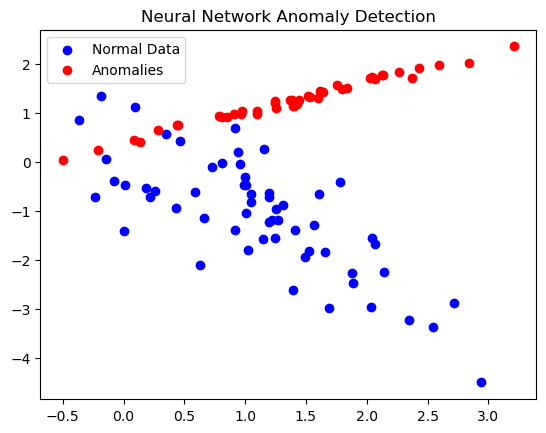

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense

# Generate synthetic data with anomalies
np.random.seed(42)
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
anomalies = 2 + 0.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data
X = np.vstack([X, anomalies])
y = np.hstack([y, np.ones(len(anomalies))])  # Anomalies are labeled as 1, normal data as 0

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Isolation Forest for Anomaly Detection
iforest = IsolationForest(contamination=0.05, random_state=42)
iforest.fit(X_train)
y_iforest_pred = iforest.predict(X_test)

# Logistic Regression for Anomaly Detection
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Naive Bayes for Anomaly Detection
nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)

# XGBoost for Anomaly Detection
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

# Neural Network for Anomaly Detection
nn_model = Sequential()
nn_model.add(Dense(8, input_dim=2, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_nn_pred = nn_model.predict(X_test)
y_nn_pred = (y_nn_pred > 0.5).astype(int)

# Evaluation
models = ["Isolation Forest", "Logistic Regression", "Naive Bayes", "XGBoost", "Neural Network"]
predictions = [y_iforest_pred, y_lr_pred, y_nb_pred, y_xgb_pred, y_nn_pred]

for model, y_pred in zip(models, predictions):
    print(f"Model: {model}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Visualization of Results (for Neural Network)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', label='Normal Data')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', label='Anomalies')
plt.title('Neural Network Anomaly Detection')
plt.legend()
plt.show()

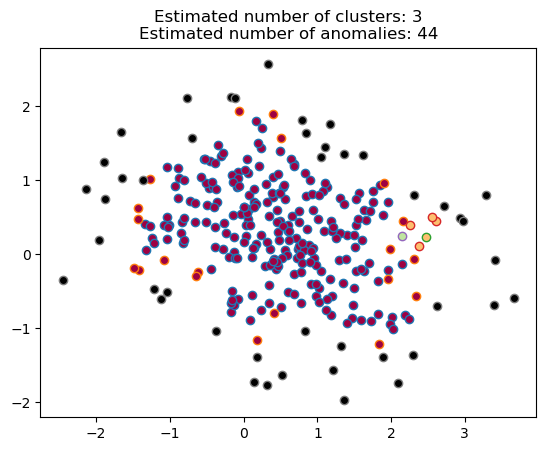

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Create a synthetic dataset with two moon-shaped clusters
X, _ = make_moons(n_samples=300, noise=0.6, random_state=42)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get cluster labels (-1 indicates anomalies)
labels = dbscan.labels_

# Separate data points into clusters and anomalies
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot the clusters and anomalies
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for anomalies
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}\nEstimated number of anomalies: {n_noise_}')
plt.show()

In [10]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Generate a synthetic dataset with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Train a Gaussian Mixture Model (GMM)
n_components = 5  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(data)

# Calculate the likelihood scores for each data point
likelihoods = -gmm.score_samples(data)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(likelihoods, 95)  # Adjust the percentile as needed

# Identify anomalies based on the threshold
anomalies_indices = np.where(likelihoods < threshold)[0]

# Plot the data and highlight anomalies
plt.scatter(data[:, 0], data[:, 1], c='b', label='Normal Data')
plt.scatter(data[anomalies_indices, 0], data[anomalies_indices, 1], c='r', marker='x', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection using Gaussian Mixture Model')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Generate a synthetic dataset with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 10)
anomalies = 4 + 1.5 * np.random.randn(10, 10)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Build an autoencoder model
input_dim = data.shape[1]
encoding_dim = 5  # Adjust the bottleneck layer size as needed

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')  # Linear activation for reconstruction
])

model.compile(optimizer='adam', loss='mse')

# Train the autoencoder
model.fit(data, data, epochs=100, batch_size=32, shuffle=True)

# Calculate reconstruction errors
reconstructed_data = model.predict(data)
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile as needed

# Identify anomalies based on the threshold
anomalies_indices = np.where(reconstruction_errors > threshold)[0]
print("Detected anomalies:", anomalies_indices)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 2.1104
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.9100
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 1.6913
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 1.6649
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 1.6767
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1.5714
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 1.5796
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.5469
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 1.5012
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 1.5040
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 1.3476
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 1.4232
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.2996
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 1.4935
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [12]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Generate a synthetic dataset with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 10)
anomalies = 4 + 1.5 * np.random.randn(10, 10)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Define an autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Create an instance of the autoencoder
input_dim = data.shape[1]
encoding_dim = 5  # Adjust the bottleneck layer size as needed
autoencoder = Autoencoder(input_dim, encoding_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Convert data to PyTorch tensors
data_tensor = torch.Tensor(data)

# Train the autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = autoencoder(data_tensor)
    loss = criterion(outputs, data_tensor)
    loss.backward()
    optimizer.step()

# Calculate reconstruction errors
reconstructed_data = autoencoder(data_tensor).detach().numpy()
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile as needed

# Identify anomalies based on the threshold
anomalies_indices = np.where(reconstruction_errors > threshold)[0]
print("Detected anomalies:", anomalies_indices)

Detected anomalies: [ 47 116 192 195 288 289 300 301 302 303 304 305 306 307 308 309]
